# Framing the problem

The goal of this report is to predict the value of a house based on some independent variables. In this report, we will be using three different variables. The model used in this report for the prediction is a **univariate linear regression model**.

In [96]:
# Importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Getting the data

In this report, we will use a data that pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data.

The source of this data is [Carlifornia Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

In [97]:
housing = pd.read_csv('../data/housing.csv')
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Exploratory Data Analysis

## Exploring and Describing the data

In this section, we are going to be looking at some info of our data.

In [98]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In the above table, we can see some popular statistical data about some of the columns in our dataset. We have 10 columns in total but `housing.describe()` shows us 9 columns, because the last column in not a numerical data and thus cannot perform any numerical operations on them.

As stated already, we will be focusing on:
- median income
- population
- number of households, and 
- median house value

### Median Income
This column represents the median income for households within a block of houses. We have a total of 20,640 rows for this variable, the values suggest that the income has been scaled down by some power of 10, what this implies is that this variable is actually measured in tens of thousands of dollars (as stated in the data source). The values range from `0.49999 ($49,999)` up to `15.0001 ($150,000)`. The mean value for the median income is `3.870671($367,067.1)`.

Text(0, 0.5, 'Frequency')

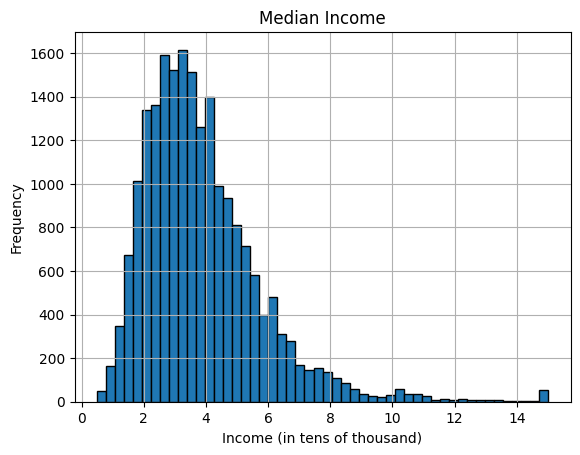

In [99]:
housing['median_income'].hist(bins=50, edgecolor="black")
plt.title('Median Income')
plt.xlabel('Income (in tens of thousand)')
plt.ylabel('Frequency')

### Median House Value
We have a total of 20640 rows for this variable, measured in dollars. The values ranges from `$14,999` up to `$500,000`. The mean value for the median house value is `$206,855.81`. The median house values are currently capped at `$500,000`, so we will need to handle this so it doesn't affect or skew our data.

Text(0, 0.5, 'Frequency')

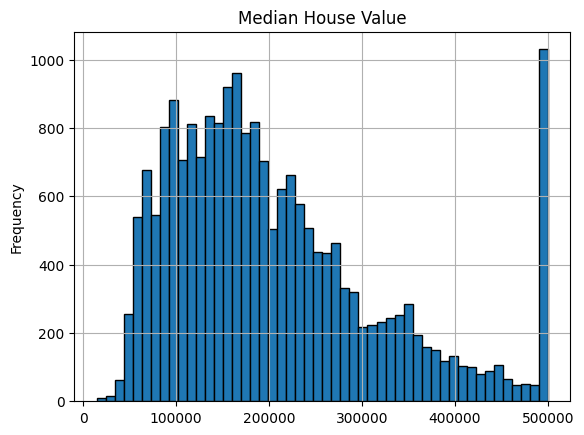

In [100]:
housing['median_house_value'].hist(bins=50, edgecolor="black")
plt.title('Median House Value')
plt.ylabel('Frequency')

The capped value is very obvious now with this histogram.

## Visualizing the Data

### Median House Value vs Median Income

[Text(0.5, 1.0, 'Median House Value vs Median Income')]

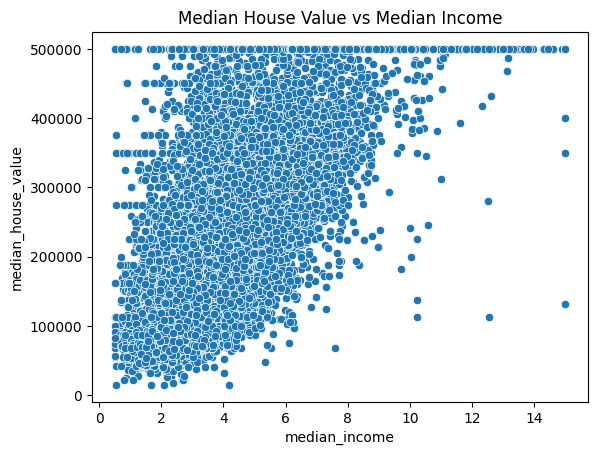

In [101]:
sns.scatterplot(x="median_income", y="median_house_value", data=housing).set(title="Median House Value vs Median Income")


In this graph, I can see that there is a degree of direct variation between these two axis, as the value of the median income increases, so does the value of the house. Which makes sense, because typically, on average, the more money a household earns, the more expensive their house will be and vice versa.

We can also see how the capped house values all line up at the top of the graph, which doesn't help our visualization.

[Text(0.5, 1.0, 'Median House Value vs Population')]

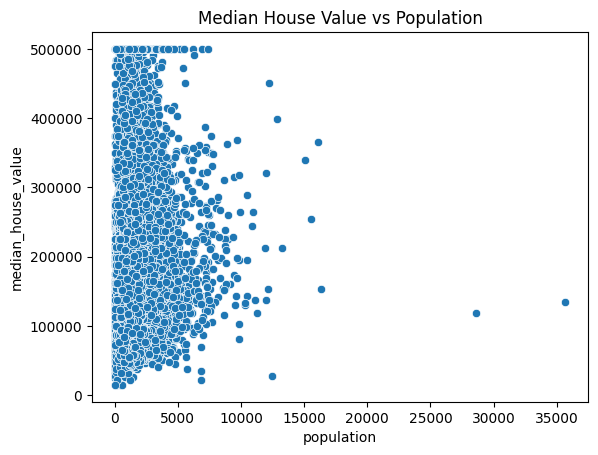

In [102]:
sns.scatterplot(x="population", y="median_house_value", data=housing).set(title="Median House Value vs Population")

There is not a direct variation here, houses seem to roughly cost along different ranges irrespective of the population size. In other words, we cannot really use the population as a predictor for the value of the house.

[Text(0.5, 1.0, 'Median House Value vs Number of Households')]

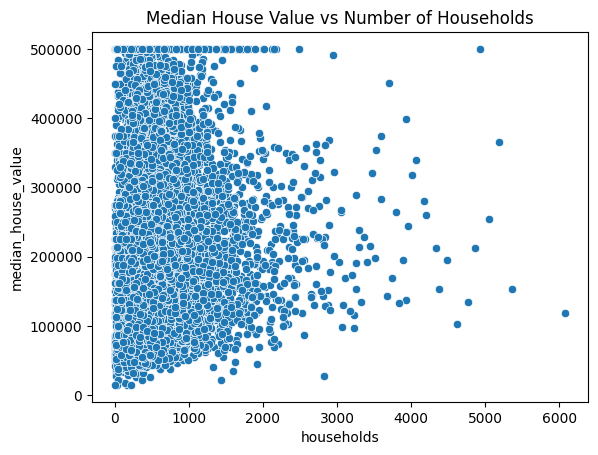

In [103]:
sns.scatterplot(x="households", y="median_house_value", data=housing).set(title="Median House Value vs Number of Households")


This is not as correlated as the graph with income but it has a better spread than the one with population. In houses with more people living in them, they cost more. But then as well, there are houses with less people living in them that cost alot.

# Data Preprocessing

We will need for clean up and filter out some data that will affect our model.

Filter out records with median_house_value = 500001 since it seems to be a cap for the median_house_value.

In [104]:
housing = housing[housing['median_house_value'] < 500001]

In [105]:
print(f"We have {len(housing)} records now.")

We have 19675 records now.


In [106]:
missing_data = housing.isnull().sum()
missing_data

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        200
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

The above code shows us that we have **200** rows that have a null value in the `total_bedrooms` column. As a good practice, it will make sense to remove these rows, even though the `total_bedrooms` column doesn't affect our projections here, but like I said, this is good, standard practice.

In [107]:
housing = housing[housing['total_bedrooms'].notna()]

In [108]:
missing_data = housing.isnull().sum()
missing_data

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Now, we have no null values in our data.

In [109]:
print(f"We now have {len(housing)} records at the end of all our preprocessing.")

We now have 19475 records at the end of all our preprocessing.


# Linear Regressions

## Define The Models

For this project, we will be using a **linear regression model**.

In [110]:
income_and_rooms_vs_house_value_model = linear_model.LinearRegression()

## Train and Test Split

**Split the data into training/testing sets. Use the first 80% of the data for training.**

In [111]:
train_size = int(len(housing) * 0.8)
train = housing[:train_size]
test = housing[train_size:]
print(f"We have {len(train)} records for our training dataset and {len(test)} records for the test data.")

We have 15580 records for our training dataset and 3895 records for the test data.


## Model for **Median House Value** vs **Median Income**

### Train the Model

In [112]:
# fit
income_and_rooms_vs_house_value_model.fit(X=train[["median_income", "total_rooms"]], y=train[["median_house_value"]])

LinearRegression()

### Evaluate the Model

For the Train and Test data:

* Print the slope and intercept
* Plot the regression line on top of the scatter plot of the training data
* Print the Mean Squared Error (MSE) and the Mean Absolute Error (MAE)

In [113]:
# print coefficients
print(f"Intercept: {income_and_rooms_vs_house_value_model.intercept_}")
print(f"Coefficients: {income_and_rooms_vs_house_value_model.coef_}")

Intercept: [48232.15877305]
Coefficients: [[ 3.88591637e+04 -2.13815261e-01]]


### Print the MSE and MAE on the train set

In [114]:
# print the MSE and MAE on the train set
print("Train set")
print(f" Mean squared error: {mean_squared_error(train[['median_house_value']], income_and_rooms_vs_house_value_model.predict(train[['median_income', 'total_rooms']]))}")
print(f" Mean absolute error: {mean_absolute_error(train[['median_house_value']], income_and_rooms_vs_house_value_model.predict(train[['median_income', 'total_rooms']]))}")

Train set
 Mean squared error: 5563203479.739362
 Mean absolute error: 55839.98297775682


### Print the MSE and MAE on the test set

In [115]:
# print the MSE and MAE on the test set
print("Test set")
print(f" Mean squared error: {mean_squared_error(test[['median_house_value']], income_and_rooms_vs_house_value_model.predict(test[['median_income', 'total_rooms']]))}")
print(f" Mean absolute error: {mean_absolute_error(test[['median_house_value']], income_and_rooms_vs_house_value_model.predict(test[['median_income', 'total_rooms']]))}")

Test set
 Mean squared error: 5794334865.182069
 Mean absolute error: 59766.790203434146


# Plotting the graphs

## Graph for Median House Value vs Median Income

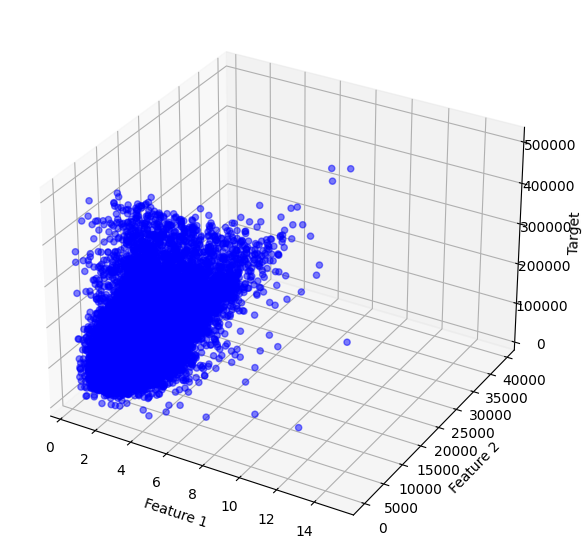

In [117]:
# Create 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train["median_income"], train["total_rooms"], train["median_house_value"], c='blue', marker='o', alpha=0.5)
ax.plot_surface(x1, x2, y_pred, color='red', alpha=0.2)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
plt.show()